**Unit test**

In [1]:
import sys
sys.path.append('./../py_programs/')
import Simulator
import tensorflow as tf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Test on  `Simulator.py`

In [2]:
# Disable all GPUs
try:
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    pass

# Set the number of threads
intra = 2  # threads used within an individual op for parallelism
inter = 2  # threads used for parallelism between independent operations
tf.config.threading.set_intra_op_parallelism_threads(intra)
tf.config.threading.set_inter_op_parallelism_threads(inter)

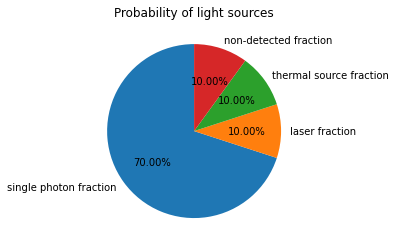

In [3]:
# test the simulator and piechart
s = Simulator.simulator(Nbins=200,  Ndet=1e5, nset=10, sps=0.7, laser=0.1, non=0.1, ther=0.1)

# get a pie chart for light sources
s.piechart()

In [4]:
# test the distribution function
s.total_dist

<tfp.distributions.Mixture 'Mixture' batch_shape=[] event_shape=[] dtype=float32>

Following plots are from the last set of data.


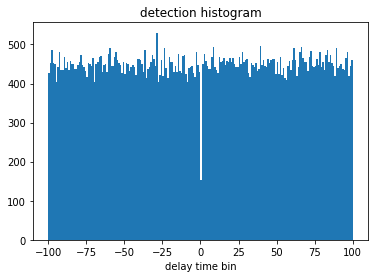

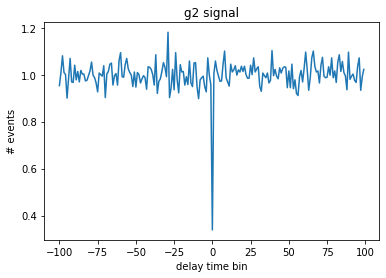

In [6]:
# test the get_data function and saved data files

data = s.get_data(plot=True, save=True, name='test')

Check the `test.txt` file in the `data` folder, the simulator seems to work.

In [8]:
# check the data file
data = Simulator.load_data('test.csv')
#print('it is a single photon source:' ,

In [9]:
data.shape

(10, 3, 200)

In [10]:
# get the result
Simulator.get_truth(data, thr = 0.5)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

*This means all of input data sets are sps*
Now let's try not sps case.

In [14]:
s2 = Simulator.simulator(Nbins=200,  Ndet=1e5, nset=10, sps=0.1, laser=0.2, non=0.2, ther=0.5)
s2data = s2.get_data()
Simulator.get_truth(data=s2data,thr=0.5)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])